<a href="https://colab.research.google.com/github/liptiavenica/Menjelajahi-Dunia-Machine-Learning/blob/master/Bab%203/C%20-%20Regresi%20Linear/Praktikum/Regresi%20Linear%20Berganda/Regression_Model_for_MPG_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Input dan Membaca Data

In [ ]:
#libraries
import pandas as pd
from google.colab import drive

In [ ]:
df = pd.read_excel("auto_mpg.xlsx")

# 2. Data Cleaning

In [ ]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140,3449,10.5,70,1,ford torino,17.0


In [ ]:
# ganti nama kolom
df.columns = ['cyl', 'disp', 'horse', 'weight', 'acl', 'myear','origin', 'name', 'mpg']

In [ ]:
df.describe()

,cyl,disp,horse,weight,acl,myear,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


Imputation - Smart way to handle missing value

In [ ]:
# jika ingin melakukan imputation, kita isi dulu nilai yang tidak masuk akal (-100000) dengan null/NA
from numpy import NaN
df.loc[df["horse"] <0, "horse"] = NaN

In [ ]:
# another imputation method - hot-deck
df.fillna(method='ffill', inplace=True)

# 3. EDA

*   Kita akan menggunakan dasar statistik pada variabel numerikal
*   Selanjutnya, kita akan melihat distribusi dari setiap variabel menggunakan bar chart untuk variabel kategorikal dan histogram untuk variabel numerikal



####Visualisasi Data

In [ ]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

[**PENTING**] Gunakan histogram untuk mempelajari nilai-nilai kolom. Jika frekuensi untuk setiap interval/bin itu sama (flat), atribut tersebut sangat mungkin untuk di-exclude dari atribut prediktor. Karna nilai dari atribut tersebut tidak berpengaruh terhadap nilai dari atribut target/kelas. Silahkan pelajari lagi bagian ini di notebook praktikum sebelumnya.

## 4. Feature Engineering

Data cleaning -- check ✅

Exploratory data analysis -- check ✅

Sekarang kita akan melakukan langkah selanjutnya: feature engineering!
Kita akan membuat scatterplot dan heatmap untuk menemukan feature yang memiliki koefisien korelasi tertinggi

### [**Mission**]
Misalkan kita ingin membuat sebuah model ML untuk dapat memprediksi nilai MPG dari suatu mobil. Kira-kira, data/informasi apa saja ya yang bisa digunakan untuk memprediksi nilai MPG? Apakah horsepowernya? Atau berat mobilnya? Atau kombinasi keduanya?


Apa itu *label encoding*? Kapan kita butuh melakukan *label encoding*?

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])

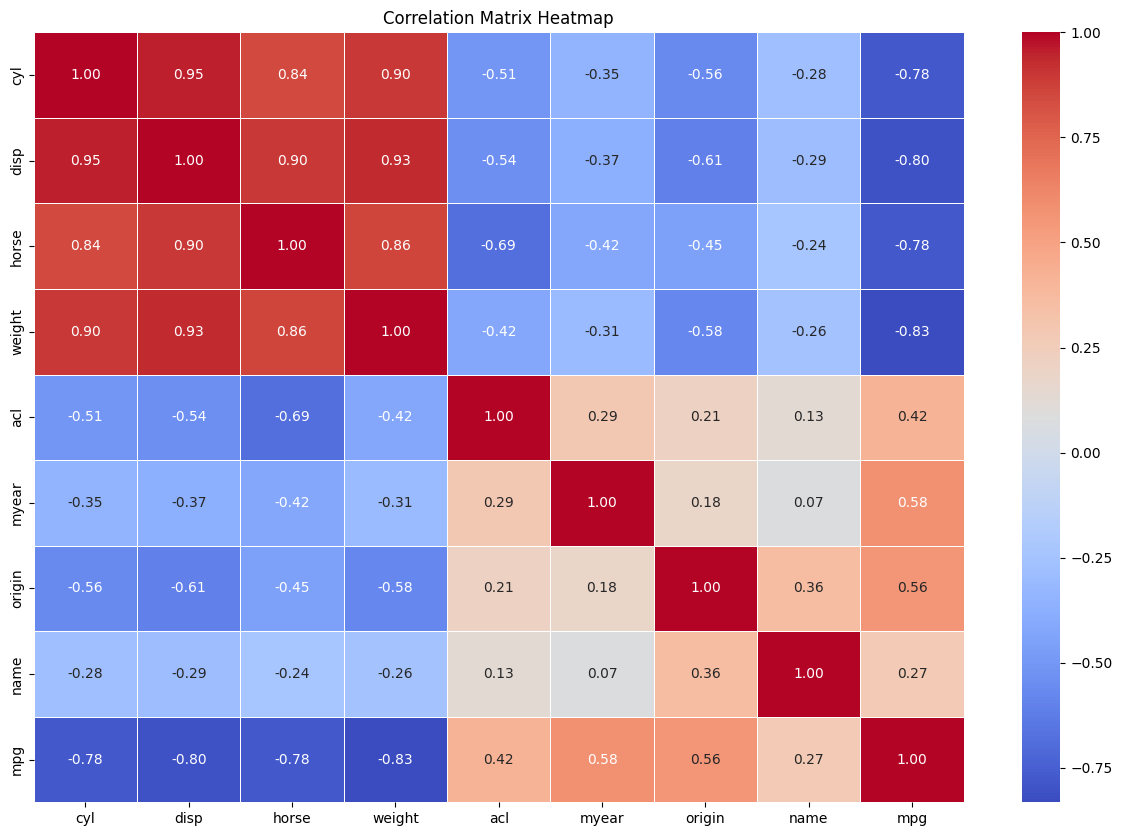

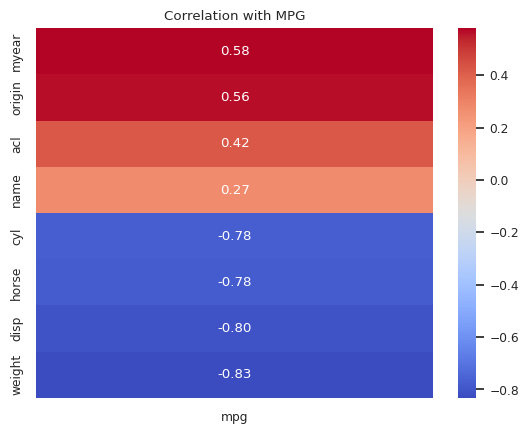

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['mpg'].drop('mpg')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with MPG')
plt.show()

Berdasarkan hasil analisis korelasi di atas, diperoleh 4 atribut yang memiliki korelasi yang tinggi dengan atribut target (MPG) yaitu weight, disp, horse, dan cyl. Maka dari itu, untuk proses pembuatan model, akan digunakan 4 atribut prediktor tersebut.

# 5. Training and Evaluation

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score


MODEL SIMPLE LINEAR REGRESSION DENGAN ATRIBUT PREDIKTOR "WEIGHT"

In [ ]:
#====================================================================#
#Pilih fitur utk regresi
x = df[['weight']]
y = df[['mpg']]

#Split dataset utk training dan test
#20% test set, 80% training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [ ]:
#KODE INI DIPAKAI JIKA INGIN MELAKUKAN TRAINING DENGAN TEKNIK TRAIN TEST SPLIT BIASA
#=====================================================================================
#train with train test split
#lm = LinearRegression()
#lm.fit(x_train, y_train) #training the algorithm

#To retrieve the intercept:
#print(model_regres.intercept_)
#For retrieving the slope:
#print(model_regres.coef_)

#y_pred = lm.predict(x_test)

#Buat dataframe utk membandingkan
#df_comp = pd.DataFrame(y_test, y_pred)

# Hitung dan tampilkan MAE, MSE dan RMSE
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Hitung dan tampilkan R2
#r_2 = r2_score(y_test, y_pred)
#print('R^2: ', r_2)

In [ ]:
#Train
lm_1 = LinearRegression()
lm_1.fit(x_train, y_train) #training the algorithm

#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_1, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))

[0.72392931 0.72023883 0.75531121 0.62620268 0.62442843]
Avg R2: 0.6900220922855368


MODEL SIMPLE LINEAR REGRESSION DENGAN ATRIBUT PREDIKTOR "HORSE"

In [ ]:
#====================================================================#
#Pilih fitur utk regresi
X = df[['horse']]
y = df[['mpg']]

#Split dataset utk training dan test
#20% test set, 80% training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
#Train
lm_2 = LinearRegression()
lm_2.fit(x_train, y_train) #training the algorithm

#Evaluasi dengan K-FOLDS CROSS VALIDATION

#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_2, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))

[0.64786575 0.64153941 0.69464122 0.58718922 0.50109778]
Avg R2: 0.6144666760637286


MODEL MULTIPLE LINEAR REGRESSION DENGAN ATRIBUT PREDIKTOR "WEIGHT" & "DISP"

In [ ]:
#====================================================================#
#Pilih fitur utk regresi
X = df[['weight', 'disp']]
y = df[['mpg']]

#Split dataset utk training dan test
#20% test set, 80% training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
#Train
lm_3 = LinearRegression()
lm_3.fit(x_train, y_train) #training the algorithm

#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_3, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))

[0.71329005 0.72684984 0.75970569 0.62875227 0.63853737]
Avg R2: 0.6934270454825959


MODEL MULTIPLE LINEAR REGRESSION DENGAN ATRIBUT PREDIKTOR "WEIGHT", "DISP" DAN "HORSE"

In [ ]:
#====================================================================#
#Pilih fitur utk regresi
X = df[['weight', 'disp', 'horse']]
y = df[['mpg']]

#Split dataset utk training dan test
#20% test set, 80% training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
#Train
lm_4 = LinearRegression()
lm_4.fit(x_train, y_train) #training the algorithm

#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_4, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))

[0.73754958 0.70417688 0.78398783 0.65729926 0.65860651]
Avg R2: 0.7083240122505018


MODEL MULTIPLE LINEAR REGRESSION DENGAN ATRIBUT PREDIKTOR "WEIGHT", "DISP", "HORSE", DAN "CYL"

In [ ]:
#====================================================================#
#Pilih fitur utk regresi
X = df[['weight', 'disp', 'horse', 'cyl']]
y = df[['mpg']]

#Split dataset utk training dan test
#20% test set, 80% training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
#Train
lm_5 = LinearRegression()
lm_5.fit(x_train, y_train) #training the algorithm


#Evaluasi dengan K-FOLDS CROSS VALIDATION
#Pilihan scoring, lihat di:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#contoh: neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, r2

folds = KFold(n_splits = 5, shuffle = True, random_state = 47)
scores = cross_val_score(lm_5, x_train, y_train, scoring='r2', cv=folds)
print(scores)
print("Avg R2: " + str(np.mean(scores)))

[0.7377035  0.70477046 0.78432377 0.65565208 0.65872949]
Avg R2: 0.7082358605698624


### KESIMPULAN: Model **lm_4** yang memiliki akurasi paling tinggi

Misalkan modeL regresi yang dihasilkan sudah dinilai berkualitas. Model lalu dapat disimpan untuk kemudian dimanfaatkan sebagai model prediksi (dideploy)
https://www.kaggle.com/prmohanty/python-how-to-save-and-load-ml-models

# 6. PEMANFAATAN MODEL UNTUK MEMPREDIKSI DATA BARU

In [ ]:
import pickle

#Simpan model dgn nama: Mpg_Regres_Model.pkl
pkl_filename = "Mpg_Regres_Model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lm_4, file)

In [ ]:
#Saatnya menggunakan model untuk memprediksi data baru
#Load/baca model yg sudah disimpan
import pickle
pkl_filename = "Mpg_Regres_Model.pkl"
with open(pkl_filename, 'rb') as file:
    loaded_model_regres = pickle.load(file)


In [ ]:
#Load data baru yg akan diprediksi nilai mpg-nya
#urutan atribut prediktornya harus sama seperti saat pembuatan model

df_new = pd.read_excel('auto_mpg_new_data.xlsx')
x_new = df_new[['weight','disp', 'horse']].values
x_new

array([[3504,  307,  130],
       [5000,  460,  170],
       [4500,  310,  160]])

In [ ]:
#Lakukan prediksi (mencari nilai mpg)
y_pred_new = loaded_model_regres.predict(x_new)
print(y_pred_new)

[[19.40676206]
 [ 9.13110241]
 [12.05921471]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
